## Jaishree Joshita

### Task 1 - Prediction using Supervised ML - Linear Regression

We have data (can be found at http://bit.ly/w-data) on the no. of study hours a student gives on daily basis to score in the examination. On the basis of that, form a regression model that helps in predicting the score if a student studies for 9.25 hrs/day using Python.

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Technical stack = Scikit learn, Numpy Array, Pandas, Matplotlib

In [81]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
# Reading the data from the above provided link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print ("data imported succesfully")

data imported succesfully


In [83]:
#print first 5 rows
data.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [84]:
#check if null values are present in the dataset and the datatype of the dataset
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [85]:
#check mean, standard deviation, min, max, quartile values of our dataset
data.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [86]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

### Visualizing the data
plotting the data graphically to drive relationship between the two variables.

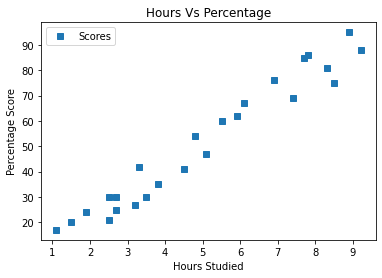

In [87]:
## Plotting the dictribution of scores

data.plot(x = 'Hours', y = 'Scores', style = 's')
plt.title ('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the Data

In [88]:
# dividing the data into "attributes" (inputs) and "labels" (outputs)
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [89]:
# Splitting this data into a training and test set by using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                            test_size = 0.2, random_state = 40)


In [90]:
print("Shape of x_train",x_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_train",x_train.shape)
print("Shape of y_test",x_test.shape)

Shape of x_train (20, 1)
Shape of x_test (5, 1)
Shape of y_train (20, 1)
Shape of y_test (5, 1)


In [91]:
## After splitting, we have to train our algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train.reshape(-1,1), y_train)

LinearRegression()

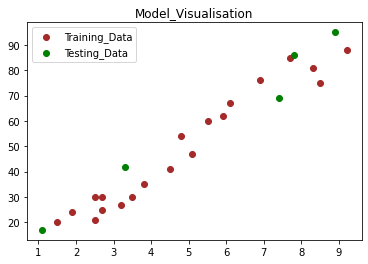

In [92]:
## Visualisation of the training and test data

plt.scatter(x_train, y_train, label = 'Training_Data', color = 'brown')
plt.scatter(x_test, y_test, label = 'Testing_Data', color = 'green')
plt.legend()
plt.title("Model_Visualisation")
plt.show()

### Plotting the Regression Line

In [93]:
regressor.coef_

array([9.74054996])

In [94]:
regressor.intercept_

1.7557382016513827

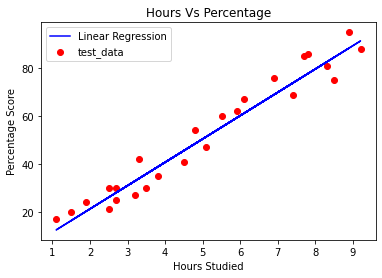

In [95]:
line = regressor.coef_*x + regressor.intercept_

# Plotting for the test data -----
plt.scatter(x,y, label = 'test_data', color = 'r')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.plot(x, line, label = 'Linear Regression', color = 'b')
plt.legend()
plt.show()

### Predictions 

In [96]:
print(x_test)   #testing data - in Hours
y_predict = regressor.predict(x_test)    #Predicting the Scores

[[8.9]
 [7.8]
 [1.1]
 [7.4]
 [3.3]]


In [97]:
print("Training data:",regressor.score(x_train,y_train))
print("Test data:", regressor.score(x_test,y_test))

Training data: 0.9504931730009657
Test data: 0.9466449081971943


In [98]:
# Comparing the Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
0,95,88.446633
1,86,77.732028
2,17,12.470343
3,69,73.835808
4,42,33.899553


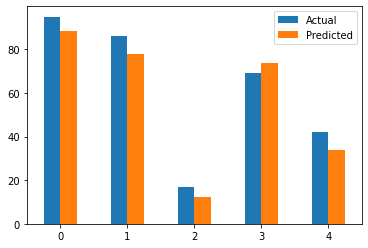

In [99]:
# Plotting the Bar graph to depict the difference between the actual value and predicted value
df.plot(kind ='bar')
plt.xticks(rotation = 0)
plt.show()

In [100]:
# Predicting the percentage score value by own data
Hours = [9.25]
own_predict = regressor.predict([Hours])
print("No. of Hours Studied = {}".format(Hours))
print("Predicted Percentage Score = {}".format(own_predict[0]))

No. of Hours Studied = [9.25]
Predicted Percentage Score = 91.85582531626392


In [101]:
regressor.predict([[9.25]]) # another way to predict the percentage score at mentioned no.

array([91.85582532])

### Evaluating the Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, I have evaluated model by using the mean absolute error, mean squared error and root mean squared error respectively.

In [102]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predict))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print ('R-2:', metrics.r2_score(y_test, y_predict))

Mean Absolute Error: 6.457450193167183
Mean Squared Error: 44.1652107906905
Root Mean Squared Error: 6.645691144695975
R-2: 0.9466449081971943


R-2 gives the score of the model fit and in this case, we have R-2 = 0.9466449081971943 which is actually a great score for this model.

Thank you.